In [1]:
from sklearn.preprocessing import PolynomialFeatures
import numpy as np

X = np.arange(4).reshape(2,2)
print('일차 단항식 계수 feature : \n', X)

poly = PolynomialFeatures(degree=2)
poly.fit(X)
poly_ftr = poly.transform(X)
print('변환된 2차 다항식 계수 feature : \n,', poly_ftr)

일차 단항식 계수 feature : 
 [[0 1]
 [2 3]]
변환된 2차 다항식 계수 feature : 
, [[1. 0. 1. 0. 0. 1.]
 [1. 2. 3. 4. 6. 9.]]


In [29]:
import numpy as np
X = range(20)

def polynomial_func(X) : # 곡선형으로 데이터를 넣기 위함
    y = 1 + 2*X + X**2 + X**3 # 3차식
    return y
y = []
for i in X :
    data = polynomial_func(i)
    y.append(data) 
    # print(data)
list(X)

1
5
17
43
89
161
265
407
593
829
1121
1475
1897
2393
2969
3631
4385
5237
6193
7259


[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19]

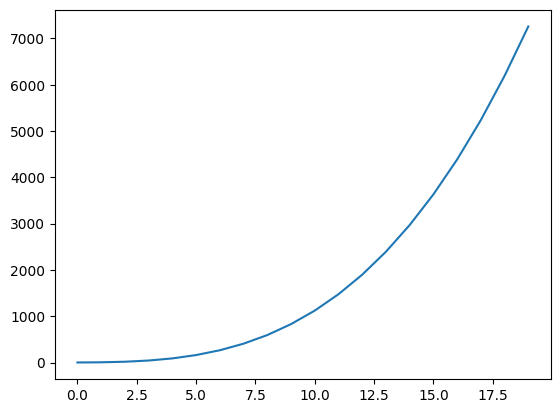

In [4]:
import matplotlib.pyplot as plt
plt.plot(X, y)

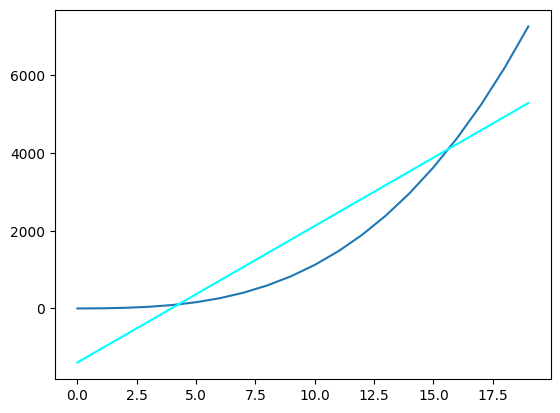

In [17]:
from sklearn.linear_model import LinearRegression

X_train = np.array(X).reshape(-1, 1)

lr = LinearRegression()
lr.fit(X_train, y)

y_pred = lr.predict(X_train)
plt.plot(X, y)
plt.plot(X, y_pred, color='aqua')

In [23]:
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree=3)
poly_X_train = poly.fit_transform(X_train)

In [24]:
poly_X_train

array([[1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00],
       [1.000e+00, 1.000e+00, 1.000e+00, 1.000e+00],
       [1.000e+00, 2.000e+00, 4.000e+00, 8.000e+00],
       [1.000e+00, 3.000e+00, 9.000e+00, 2.700e+01],
       [1.000e+00, 4.000e+00, 1.600e+01, 6.400e+01],
       [1.000e+00, 5.000e+00, 2.500e+01, 1.250e+02],
       [1.000e+00, 6.000e+00, 3.600e+01, 2.160e+02],
       [1.000e+00, 7.000e+00, 4.900e+01, 3.430e+02],
       [1.000e+00, 8.000e+00, 6.400e+01, 5.120e+02],
       [1.000e+00, 9.000e+00, 8.100e+01, 7.290e+02],
       [1.000e+00, 1.000e+01, 1.000e+02, 1.000e+03],
       [1.000e+00, 1.100e+01, 1.210e+02, 1.331e+03],
       [1.000e+00, 1.200e+01, 1.440e+02, 1.728e+03],
       [1.000e+00, 1.300e+01, 1.690e+02, 2.197e+03],
       [1.000e+00, 1.400e+01, 1.960e+02, 2.744e+03],
       [1.000e+00, 1.500e+01, 2.250e+02, 3.375e+03],
       [1.000e+00, 1.600e+01, 2.560e+02, 4.096e+03],
       [1.000e+00, 1.700e+01, 2.890e+02, 4.913e+03],
       [1.000e+00, 1.800e+01, 3.240e+02, 5.832

In [25]:
lr.fit(poly_X_train, y)
y_pred = lr.predict(poly_X_train)
y_pred

array([1.000e+00, 5.000e+00, 1.700e+01, 4.300e+01, 8.900e+01, 1.610e+02,
       2.650e+02, 4.070e+02, 5.930e+02, 8.290e+02, 1.121e+03, 1.475e+03,
       1.897e+03, 2.393e+03, 2.969e+03, 3.631e+03, 4.385e+03, 5.237e+03,
       6.193e+03, 7.259e+03])

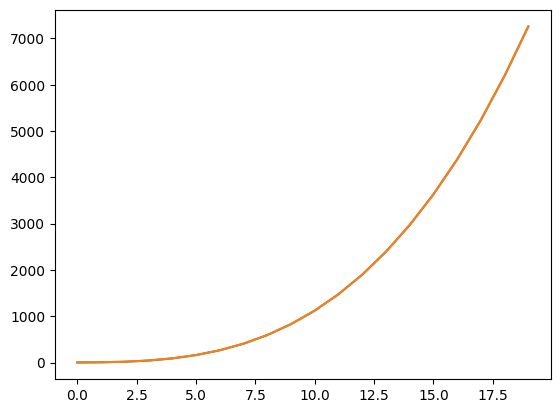

In [28]:
plt.plot(X, y)
plt.plot(X, y_pred) # 동일

In [30]:
lr.coef_

array([0., 2., 1., 1.])

### sklearn.pipeline.Pipeline
- steps, *, memory=None, verbose=False

In [51]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
import numpy as np

def polynomial_func(X) :
    y = 1 + 2*X + X**2 + X**3
    return y

model = Pipeline([('poly', PolynomialFeatures(degree=3)),
                  ('linear', LinearRegression())])

X = np.arange(4).reshape(2,2)
y = polynomial_func(X)

model = model.fit(X, y)
print('Polynomial 회귀 계수\n', np.round(model.named_steps['linear'].coef_, 2))

Polynomial 회귀 계수
 [[0.   0.02 0.02 0.05 0.07 0.1  0.1  0.14 0.22 0.31]
 [0.   0.06 0.06 0.11 0.17 0.23 0.23 0.34 0.51 0.74]]


### housing 데이터 이용
- 다중공선성 제거 : 일부 변수가 다른 변수와 상관 정도가 높아 데이터 분석에 부정적인 영향을 끼치는 데이터 -> 독립 변수 간의 상관관계를 분석하고, 추정량을 분석하고자 할 때 제거
- 스케일링
- Polynomial

In [44]:
import pandas as pd
from patsy import dmatrices
from statsmodels.stats.outliers_influence import variance_inflation_factor

housing = pd.read_csv('datasets/housing.csv', header=None, names=['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV'], sep='\s+')

y, X = dmatrices('MEDV ~ CRIM + ZN + INDUS + CHAS + NOX + RM + AGE + DIS + RAD + TAX + PTRATIO + B + LSTAT + MEDV', housing, return_type='dataframe')
vif = pd.DataFrame()
vif['VIF Factor'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['Features'] = X.columns
vif


,VIF Factor,Features
0,645.977937,Intercept
1,1.831537,CRIM
2,2.352186,ZN
3,3.992503,INDUS
4,1.095223,CHAS
5,4.586920,NOX
6,2.260374,RM
7,3.100843,AGE
8,4.396007,DIS
9,7.808198,RAD


In [45]:
housing = housing.drop(columns=['TAX','RAD'])
housing

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,21.0,393.45,6.48,22.0


In [46]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [60]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

scaler = StandardScaler()
scaler.fit(X_train)
X_scaled_train = scaler.transform(X_train)
X_scaled_test = scaler.transform(X_test)

# lr = LinearRegression()
# lr.fit(X_scaled_train, y_train)
# y_pred = lr.predict(X_scaled_train)
# mse = mean_squared_error(y_test, y_pred)
# rmse = np.sqrt(mse)

# mse, rmse


In [74]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

scaler = StandardScaler()
scaler.fit(X_train)
X_scaled_train = scaler.transform(X_train)
X_scaled_test = scaler.transform(X_test)

lr = LinearRegression()
lr.fit(X_scaled_train, y_train)
y_pred = lr.predict(X_scaled_test)

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

print(mse)
print(rmse)

850.0
29.154759474226502


In [70]:
poly = PolynomialFeatures(degree=2)

poly_scaled_X_train = poly.fit(X_scaled_train)
poly_scaled_X_test = poly.fit(X_scaled_test)

In [71]:
p_model = Pipeline([('poly', PolynomialFeatures(degree=2, include_bias=False)),
                    ('linear', LinearRegression())])
p_model

Pipeline(steps=[('poly', PolynomialFeatures(include_bias=False)),
                ('linear', LinearRegression())])

In [72]:
from sklearn.metrics import mean_squared_error, r2_score

p_model.fit(X_scaled_train, y_train)
y_preds = p_model.predict(X_test)
mse = mean_squared_error(y_test, y_preds)
rmse = np.sqrt(mse)

print(f'MSE : {mse:.3f}, RMSE : {rmse:.3f}')
print(f'Variance Score : {r2_score(y_test, y_preds)}')

MSE : 47709.210, RMSE : 218.424
Variance Score : -584.9035349963623


/opt/homebrew/lib/python3.11/site-packages/sklearn/base.py:486: UserWarning: X has feature names, but PolynomialFeatures was fitted without feature names
  warnings.warn(


### HousingPrice

In [77]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.preprocessing import RobustScaler, StandardScaler 
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import mean_squared_error
from statsmodels.stats.outliers_influence import variance_inflation_factor

house_df = pd.read_csv('datasets/housing.csv' , header=None, names=['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']  , sep='\s+')

# 다중공선성 확인
y, X = dmatrices('MEDV ~ CRIM+ZN + INDUS + CHAS + NOX + RM + AGE + DIS + RAD + TAX + PTRATIO + B + LSTAT ', house_df, return_type = 'dataframe')

vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif["features"] = X.columns 

# vif 가장 높은값 2개 제거
df = house_df.drop(['RAD', 'TAX'] ,axis=1)

features = df.drop('MEDV' ,axis=1) 
label = df['MEDV']

X_train, X_test , y_train , y_test = train_test_split(features , label , test_size=0.2 , random_state=42)

scaler = StandardScaler()
scaler.fit(X_train)
scaled_X_train  = scaler.transform(X_train)
scaled_X_test  = scaler.transform(X_test) 

poly = PolynomialFeatures(degree=2)
poly.fit(scaled_X_train)
poly_X_train = poly.fit_transform(scaled_X_train)
poly_X_test  = poly.fit_transform(scaled_X_test)


lr = LinearRegression()
lr.fit(scaled_X_train ,y_train )
# lr.fit(scaled_X_train , y_train)
result = cross_val_score(lr ,X=scaled_X_train, y=y_train,  cv=3 , scoring='neg_mean_squared_error')
print(f'not poly: {result}')


from sklearn.metrics import r2_score
y_preds = lr.predict(scaled_X_test)
mse = mean_squared_error(y_test, y_preds)
rmse = np.sqrt(mse)

print(f'not poly mse: {mse} , rmse : {rmse}')
print(f'not poly Variance score : {r2_score(y_test, y_preds):.3f}')

print('--------------------------------------------------------')

lr.fit(poly_X_train ,y_train )
# lr.fit(scaled_X_train , y_train)
result = cross_val_score(lr ,X=poly_X_train, y=y_train,  cv=3 , scoring='neg_mean_squared_error')
print(f'poly: {result}')

from sklearn.metrics import r2_score
y_preds = lr.predict(poly_X_test)
mse = mean_squared_error(y_test, y_preds)
rmse = np.sqrt(mse)
print(f'poly mse: {mse} , rmse : {rmse}')
print(f'poly Variance score : {r2_score(y_test, y_preds):.3f}')

not poly: [-25.60304518 -24.75144126 -21.49544997]
not poly mse: 26.498890775415365 , rmse : 5.147707331950348
not poly Variance score : 0.639
--------------------------------------------------------
poly: [-103.17863513  -32.83988101  -14.29835616]
poly mse: 16.31148061527925 , rmse : 4.038747406718976
poly Variance score : 0.778
